**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния(мера Минковского) используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import KDTree
%load_ext pycodestyle_magic

In [32]:
%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.y_ = np.array(y)
        self.classes_ = len(np.unique(y))
        if self.algorithm == 'kd_tree':
            self.Tree_ = KDTree(X)
        elif self.algorithm == 'brute':
            self.X_ = np.array(X)

    def predict(self, X):
        if self.algorithm == 'brute':
            dst = pairwise_distances(X, self.X_)
            y_pred = np.argpartition(dst, self.n_neighbors, axis=1)
            y_pred = self.y_[y_pred[:, :self.n_neighbors]]
            y_pred = sp.stats.mode(y_pred, axis=1)[0].flatten()
        elif self.algorithm == 'kd_tree':
            tree = self.Tree_
            y_pred = tree.query(X, self.n_neighbors, return_distance=False)
            y_pred = self.y_[y_pred]
            y_pred = sp.stats.mode(y_pred, axis=1)[0].flatten()
        return y_pred

    def predict_proba(self, X):
        if self.algorithm == 'brute':
            dst = pairwise_distances(X, self.X_)
            y_pred = np.argpartition(dst, self.n_neighbors, axis=1)
            y_pred = self.y_[y_pred[:, :self.n_neighbors]]
            y_pred = np.array(y_pred, dtype='int')
        elif self.algorithm == 'kd_tree':
            tree = self.Tree_
            y_pred = tree.query(X, self.n_neighbors, return_distance=False)
            y_pred = np.array(self.y_[y_pred], dtype='int')
        proba = np.apply_along_axis(np.bincount, 1, y_pred, minlength=self.classes_)
        return proba / self.n_neighbors

    def score(self, X, y):
        y_pred = np.array(self.predict(X), dtype='int')
        score = (np.array(y, dtype='int') - y_pred == 0).sum() / len(y)
        return score

4:80: E501 line too long (102 > 79 characters)
41:80: E501 line too long (84 > 79 characters)
48:1: W391 blank line at end of file


**IRIS**

In [21]:
iris = datasets.load_iris()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [23]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [24]:
%time clf.fit(X_train, y_train)

Wall time: 2 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [25]:
%time my_clf.fit(X_train, y_train)

Wall time: 998 µs


In [26]:
%time clf.predict(X_test)

Wall time: 4 ms


array([1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 1, 0])

In [27]:
%time my_clf.predict(X_test)

Wall time: 2 ms


array([1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 1, 0])

In [28]:
%time clf.predict_proba(X_test)

Wall time: 6.99 ms


array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ]])

In [29]:
%time my_clf.predict_proba(X_test)

Wall time: 4.99 ms


array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ]])

In [30]:
clf.score(X_test, y_test)

0.8666666666666667

In [31]:
my_clf.score(X_test, y_test)

0.8666666666666667

Задание 3

Best score with n=17


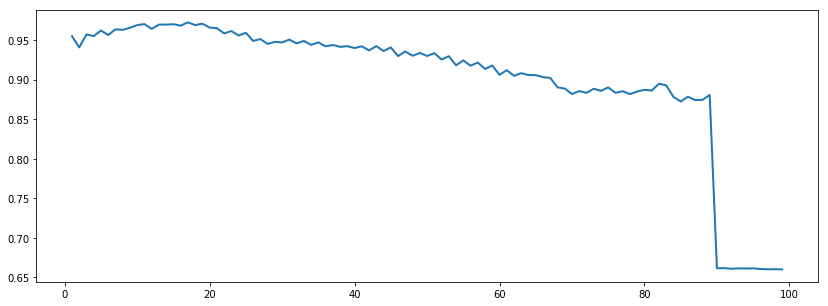

In [33]:
fig = plt.figure(figsize= (14,5))
ax = plt.subplot(111)
neighbors = np.arange(1, 100, 1)
score = np.zeros(shape=(99))
for i in range(400):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
    my_clf = MyKNeighborsClassifier(n_neighbors=1)
    my_clf.fit(X_train, y_train)
    for j in range(len(neighbors)):
        my_clf.n_neighbors = neighbors[j]
        score[j] += my_clf.score(X_test, y_test)
score = score / 400
print('Best score with n={}'.format(np.argmax(score) + 1))
line, = plt.plot(neighbors, score, lw=2)
plt.show()

**MNIST**

In [88]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [89]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [90]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [91]:
%time clf.fit(X_train, y_train)

Wall time: 3min 57s
Parser   : 268 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [92]:
%time my_clf.fit(X_train, y_train)

Wall time: 8.12 s


In [93]:
%time clf.predict(X_test)

Wall time: 4min 27s
Parser   : 199 ms


array(['2', '4', '3', '6', '7', '1', '8', '2', '7', '0', '8', '7', '9',
       '3', '8', '7', '5', '1', '6', '1', '7', '1', '0', '9', '8', '1',
       '3', '5', '3', '5', '0', '2', '4', '8', '6', '1', '8', '6', '7',
       '1', '8', '3', '1', '9', '6', '6', '8', '5', '6', '5', '3', '7',
       '0', '3', '7', '2', '7', '5', '7', '3', '0', '5', '2', '3', '3',
       '0', '9', '8', '4', '4', '1', '1', '6', '6', '0', '1', '1', '9',
       '0', '2', '8', '3', '1', '4', '0', '4', '8', '3', '8', '9', '6',
       '8', '7', '7', '9', '3', '2', '0', '7', '1', '2', '4', '2', '3',
       '5', '9', '7', '5', '6', '4', '1', '5', '3', '1', '0', '0', '9',
       '2', '1', '3', '0', '7', '9', '7', '1', '2', '6', '3', '0', '7',
       '0', '0', '5', '6', '7', '5', '2', '0', '6', '7', '4', '3', '2',
       '0', '1', '7', '4', '7', '6', '6', '8', '2', '4', '2', '3', '6',
       '4', '5', '5', '1', '6', '1', '1', '3', '0', '4', '5', '4', '7',
       '3', '4', '1', '2', '7', '5', '0', '2', '7', '5', '2', '7

In [94]:
%time my_clf.predict(X_test)


C:\Users\MK\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


Wall time: 1min 6s


array(['2', '4', '3', '6', '7', '1', '8', '2', '7', '0', '8', '7', '9',
       '3', '8', '7', '5', '1', '6', '1', '7', '1', '0', '9', '8', '1',
       '3', '5', '3', '5', '0', '2', '4', '8', '6', '1', '8', '6', '7',
       '1', '8', '3', '1', '9', '6', '6', '8', '5', '6', '5', '3', '7',
       '0', '3', '7', '2', '7', '5', '7', '3', '0', '5', '2', '3', '3',
       '0', '9', '8', '4', '4', '1', '1', '6', '6', '0', '1', '1', '9',
       '0', '2', '8', '3', '1', '4', '0', '4', '8', '3', '8', '9', '6',
       '8', '7', '7', '9', '3', '2', '0', '7', '1', '2', '4', '2', '3',
       '5', '9', '7', '5', '6', '4', '1', '5', '3', '1', '0', '0', '9',
       '2', '1', '3', '0', '7', '9', '7', '1', '2', '6', '3', '0', '7',
       '0', '0', '5', '6', '7', '5', '2', '0', '6', '7', '4', '3', '2',
       '0', '1', '7', '4', '7', '6', '6', '8', '2', '4', '2', '3', '6',
       '4', '5', '5', '1', '6', '1', '1', '3', '0', '4', '5', '4', '7',
       '3', '4', '1', '2', '7', '5', '0', '2', '7', '5', '2', '7

In [95]:
%time clf.predict_proba(X_test)

Wall time: 4min 33s
Parser   : 286 ms


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [96]:
%time my_clf.predict_proba(X_test)

Wall time: 1min 6s
Parser   : 173 ms


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [97]:
clf.score(X_test, y_test)

0.9642857142857143

In [98]:
my_clf.score(X_test, y_test)

C:\Users\MK\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


0.9642857142857143

Задание 4

In [99]:
clf = KNeighborsClassifier(n_neighbors=17, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=17, algorithm='kd_tree')

In [100]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [101]:
%time clf.fit(X_train, y_train)

Wall time: 4min 4s
Parser   : 322 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [102]:
%time my_clf.fit(X_train, y_train)

Wall time: 4min 22s
Parser   : 370 ms


In [103]:
%time clf.predict(X_test)

Wall time: 4min 47s
Compiler : 185 ms
Parser   : 197 ms


array(['5', '2', '4', '2', '5', '4', '1', '6', '7', '4', '6', '9', '4',
       '2', '1', '5', '5', '2', '6', '8', '3', '2', '7', '7', '0', '0',
       '7', '2', '0', '3', '8', '9', '6', '6', '6', '9', '1', '8', '9',
       '4', '5', '1', '9', '7', '7', '6', '4', '0', '9', '4', '9', '6',
       '3', '2', '6', '9', '4', '8', '4', '6', '9', '9', '2', '8', '4',
       '6', '4', '1', '1', '1', '2', '9', '0', '9', '4', '6', '4', '6',
       '1', '5', '9', '3', '9', '9', '7', '7', '8', '0', '3', '7', '9',
       '2', '7', '5', '5', '9', '6', '7', '2', '2', '7', '4', '8', '4',
       '2', '4', '5', '8', '0', '4', '9', '1', '6', '7', '4', '4', '4',
       '3', '2', '1', '8', '8', '8', '4', '4', '2', '5', '1', '6', '9',
       '9', '7', '5', '9', '8', '1', '5', '0', '0', '2', '1', '9', '1',
       '2', '7', '9', '2', '8', '4', '5', '1', '6', '5', '8', '6', '1',
       '9', '6', '7', '8', '6', '3', '6', '0', '3', '6', '4', '0', '7',
       '2', '6', '3', '7', '0', '5', '5', '2', '0', '9', '8', '9

In [104]:
%time my_clf.predict(X_test)

Wall time: 3min 38s
Parser   : 187 ms


C:\Users\MK\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


array(['5', '2', '4', '2', '5', '4', '1', '6', '7', '4', '6', '9', '4',
       '2', '1', '5', '5', '2', '6', '8', '3', '2', '7', '7', '0', '0',
       '7', '2', '0', '3', '8', '9', '6', '6', '6', '9', '1', '8', '9',
       '4', '5', '1', '9', '7', '7', '6', '4', '0', '9', '4', '9', '6',
       '3', '2', '6', '9', '4', '8', '4', '6', '9', '9', '2', '8', '4',
       '6', '4', '1', '1', '1', '2', '9', '0', '9', '4', '6', '4', '6',
       '1', '5', '9', '3', '9', '9', '7', '7', '8', '0', '3', '7', '9',
       '2', '7', '5', '5', '9', '6', '7', '2', '2', '7', '4', '8', '4',
       '2', '4', '5', '8', '0', '4', '9', '1', '6', '7', '4', '4', '4',
       '3', '2', '1', '8', '8', '8', '4', '4', '2', '5', '1', '6', '9',
       '9', '7', '5', '9', '8', '1', '5', '0', '0', '2', '1', '9', '1',
       '2', '7', '9', '2', '8', '4', '5', '1', '6', '5', '8', '6', '1',
       '9', '6', '7', '8', '6', '3', '6', '0', '3', '6', '4', '0', '7',
       '2', '6', '3', '7', '0', '5', '5', '2', '0', '9', '8', '9

In [105]:
%time clf.predict_proba(X_test)

Wall time: 4min 36s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [106]:
%time my_clf.predict_proba(X_test)

Wall time: 3min 32s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [107]:
clf.score(X_test, y_test)

0.9614285714285714

In [108]:
my_clf.score(X_test, y_test)

C:\Users\MK\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


0.9614285714285714


Задание 5

In [ ]:
# seaborn - построение сложных и информативных видов графиков, выручает, когда matplotlib не подходит
# matplotlib - стандартная библиотека для построения графиков
# train_test_split - разбиение датасета на тестовую и обучающую выборки
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - реализация конвейера(удобно, когда нужно проделать много однотипных операций)
# StandardScaler (from sklearn.preprocessing import StandardScaler) - стандартизация датасета(приведение данных таким обрзом, 
# чтобы датасет имел среднее значение 0 и стандартное отклонение 1)
# ClassifierMixin - универсальный класс для всех классификаторов, может подсчитывать score
# NeighborsBase - базовый класс, содержащий все параметры, необходимые для KNN
# KNeighborsMixin - базовый класс для KNN
# SupervisedIntegerMixin - универсальный класс для всех классификаторов, может делать fit модели при обучении с учителем